# Importing dataset and libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

In [ ]:
from google.colab import files

files = files.upload()

Saving shopping.csv to shopping.csv


In [ ]:
import pandas as pd
df = pd.read_csv('shopping.csv')
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Analysing basics metrics

In [ ]:
df.shape

(12330, 18)

In [ ]:
print(f"Number of rows : {df.shape[0]}")
print(f"Number of columns : {df.shape[1]}")

Number of rows : 12330
Number of columns : 18


In [ ]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [ ]:
def is__unique(i):
  print(df[i].unique())

In [ ]:
cols = ["Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend", "Revenue"]

for ele in cols:
  print(ele)
  print(is__unique(ele))
  print("**************************")

Month
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
None
**************************
OperatingSystems
[1 2 4 3 7 6 8 5]
None
**************************
Browser
[ 1  2  3  4  5  6  7 10  8  9 12 13 11]
None
**************************
Region
[1 9 2 3 4 5 6 7 8]
None
**************************
TrafficType
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]
None
**************************
VisitorType
['Returning_Visitor' 'New_Visitor' 'Other']
None
**************************
Weekend
[False  True]
None
**************************
Revenue
[False  True]
None
**************************


In [ ]:
def distribution(i):
  print(df[i].value_counts(normalize = True)*100)


In [ ]:
columns = ["Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend", "Revenue"]


for ele in columns:
  print(ele)
  print()
  print(distribution(ele))
  print("***************************")

Month

May     27.283049
Nov     24.314680
Mar     15.466342
Dec     14.006488
Oct      4.452555
Sep      3.633414
Aug      3.511760
Jul      3.503650
June     2.335766
Feb      1.492295
Name: Month, dtype: float64
None
***************************
OperatingSystems

2    53.536091
1    20.965126
3    20.721817
4     3.876723
8     0.640714
6     0.154096
7     0.056772
5     0.048662
Name: OperatingSystems, dtype: float64
None
***************************
Browser

2     64.566099
1     19.967559
4      5.969181
5      3.787510
6      1.411192
10     1.321979
8      1.094891
3      0.851582
13     0.494728
7      0.397405
12     0.081103
11     0.048662
9      0.008110
Name: Browser, dtype: float64
None
***************************
Region

1    38.767234
3    19.489051
4     9.586375
2     9.213301
6     6.528792
7     6.171938
9     4.144363
8     3.519870
5     2.579075
Name: Region, dtype: float64
None
***************************
TrafficType

2     31.735604
1     19.878345
3     16.642

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


1. There are no missing values in the dataset.
2. Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates might have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.

# Univariate Analysis:

## Histograms to study distribution of data for numerical features

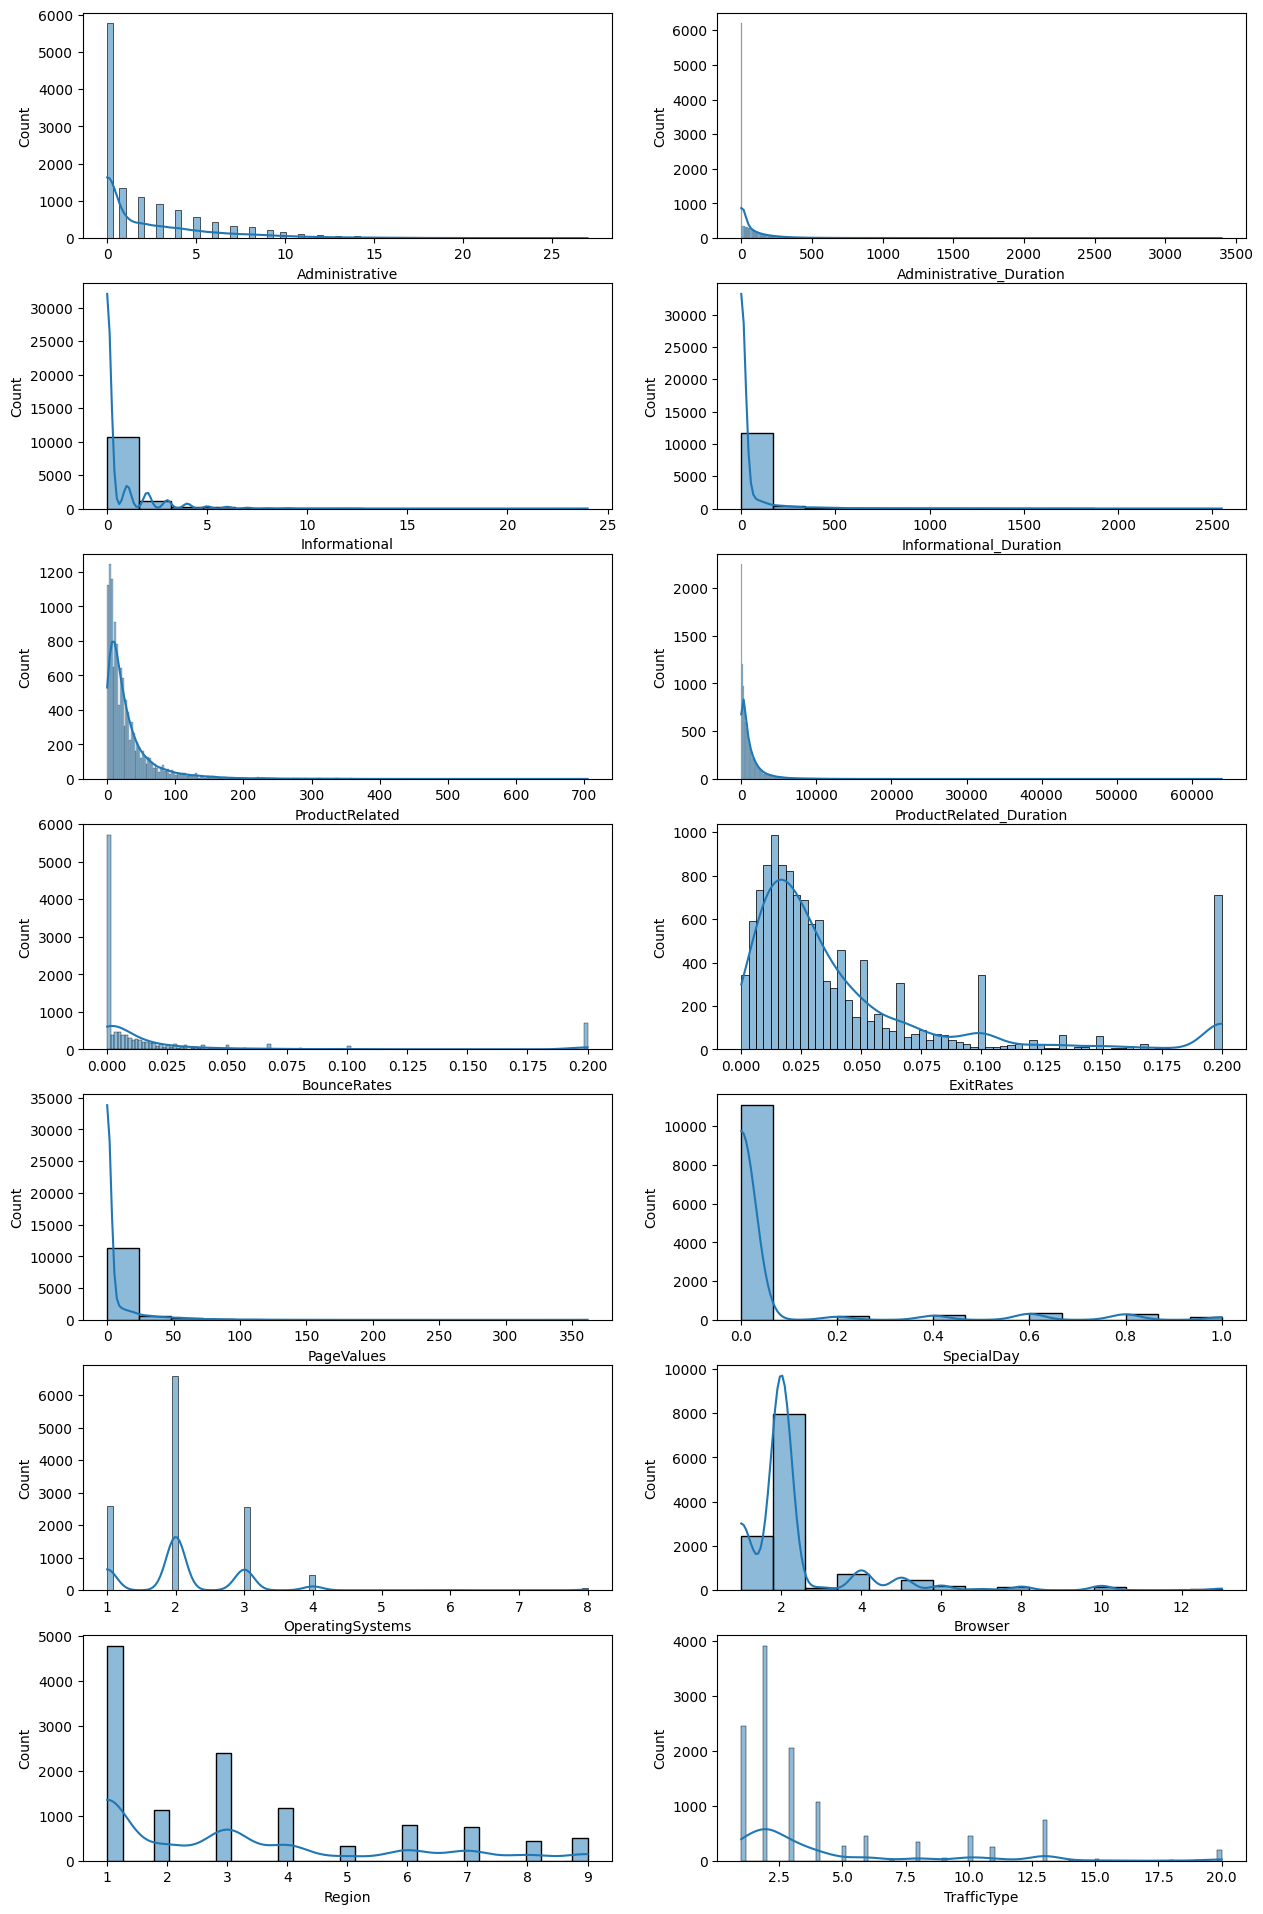

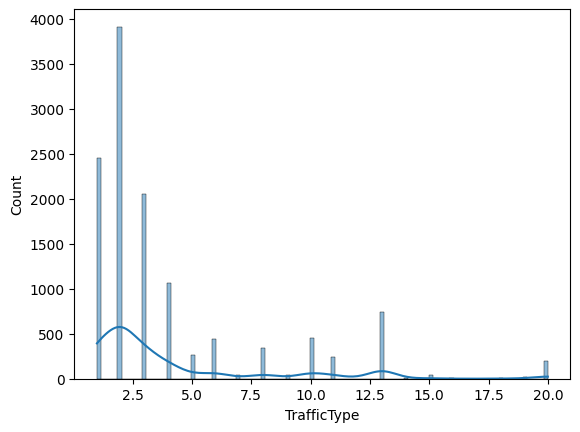

In [ ]:
# understanding the distribution for numerical features

num_cols = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']
fig, axis = plt.subplots(nrows=7, ncols=2, figsize=(15, 24))
index = 0
for row in range(7):
  for col in range(2):
    sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
    index += 1
plt.show()
sns.histplot(df[num_cols[-1]], kde=True)
plt.show()

## Boxplots to study outliers

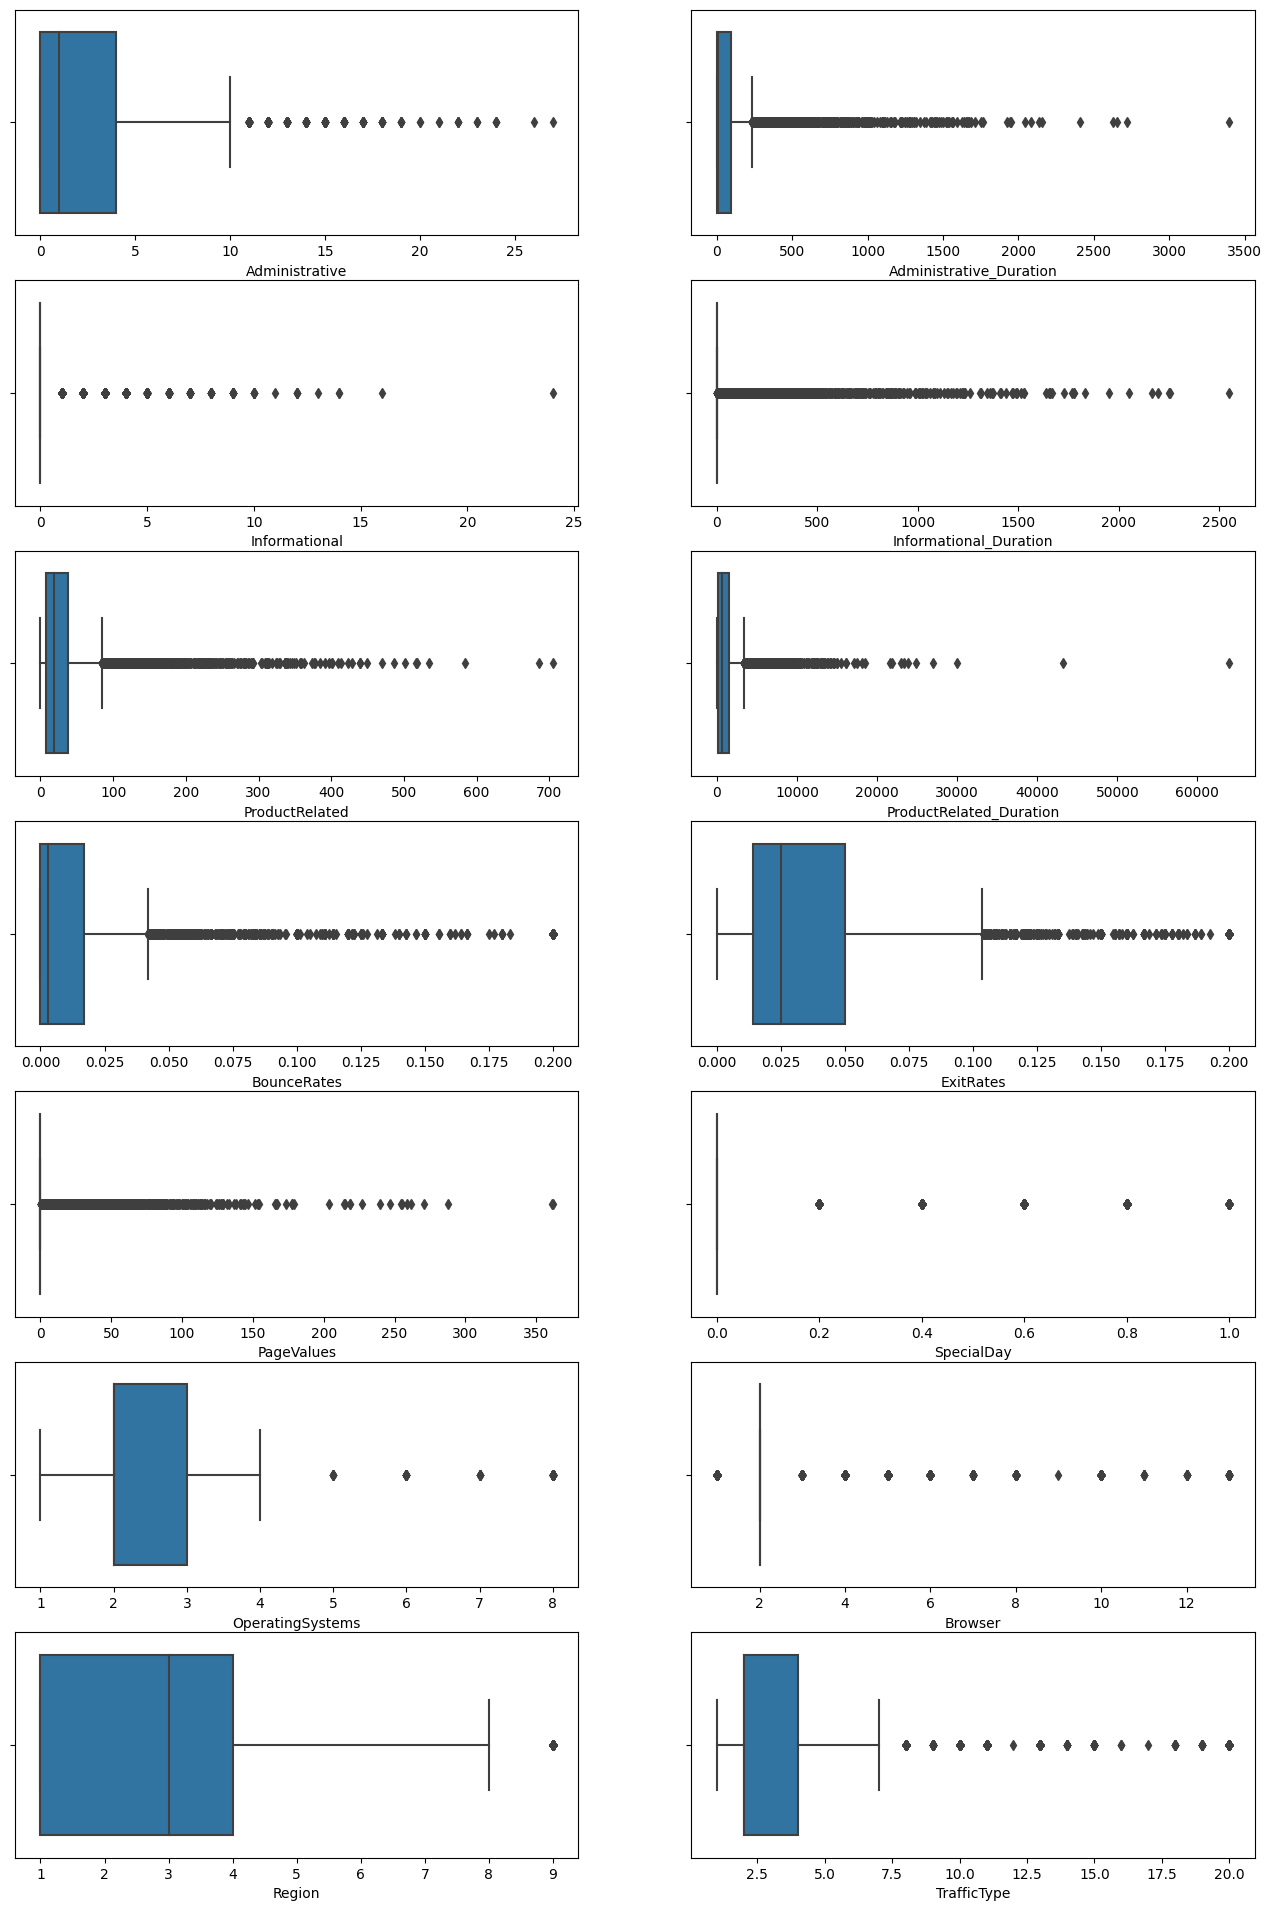

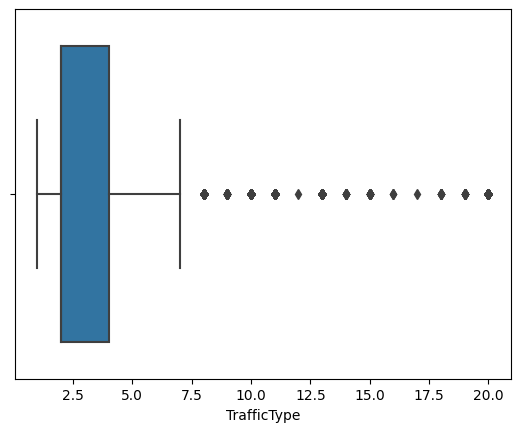

In [ ]:

fig, axis = plt.subplots(nrows=7, ncols=2, figsize=(16, 24))
index = 0
for row in range(7):
  for col in range(2):
    sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
    index += 1
plt.show()
sns.boxplot(x=df[num_cols[-1]])
plt.show()

## Countplot

In [ ]:
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False


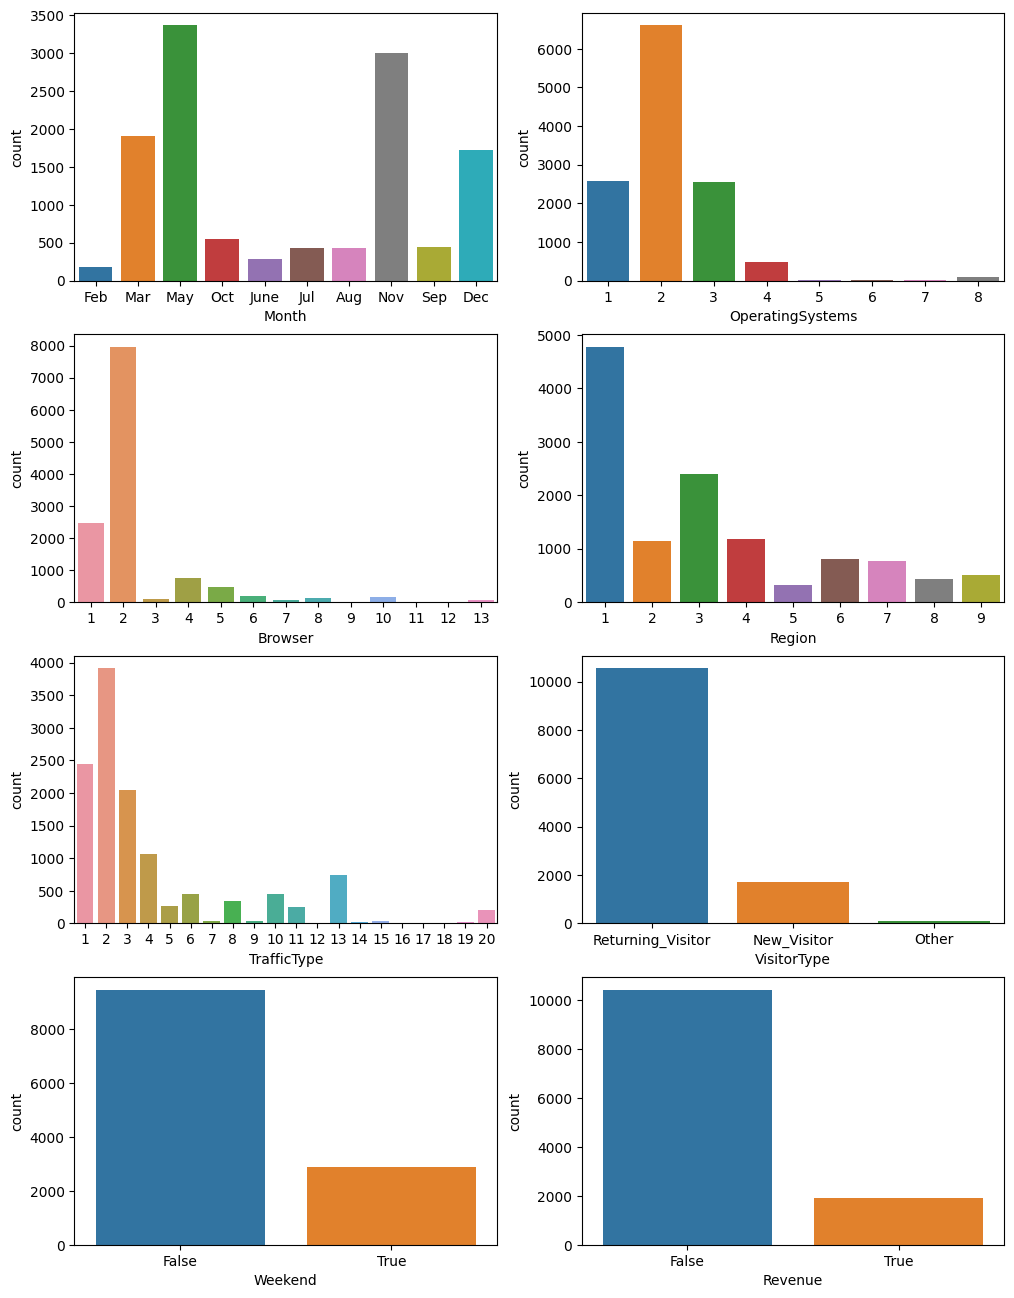

In [ ]:
cat_cols = ["Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend","Revenue"]
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
index = 0
for row in range(4):
  for col in range(2):
    sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
    index += 1
plt.show()

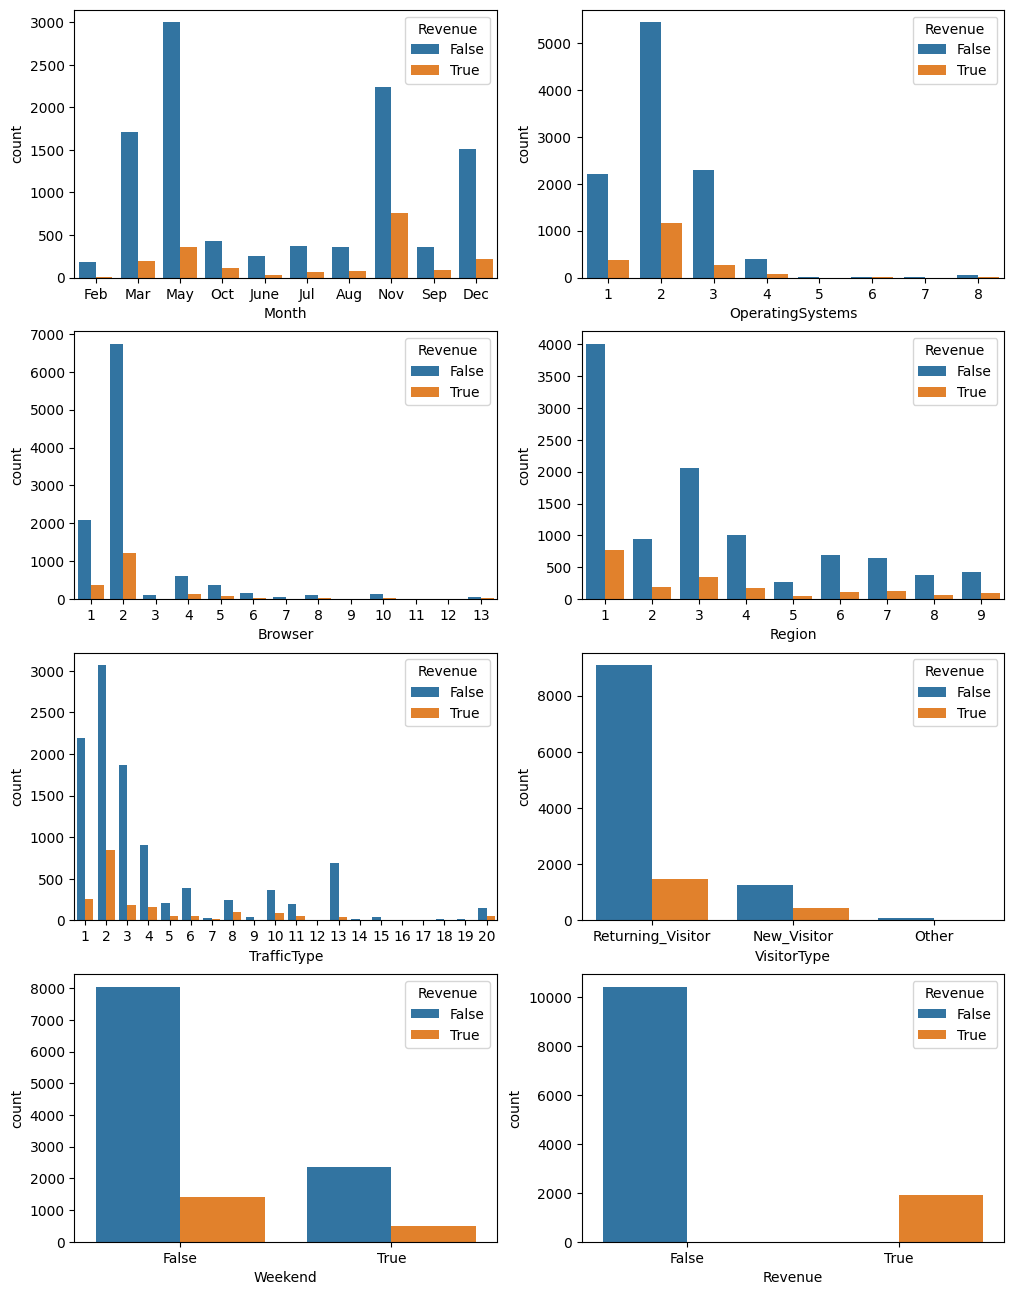

In [ ]:
cat_cols = ["Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend", "Revenue"]
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
index = 0
for row in range(4):
  for col in range(2):
    sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col], hue= "Revenue")
    index += 1
plt.show()

# Bivariate analysis

## Plotting categorical variables againt count using boxplots

In [ ]:
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False


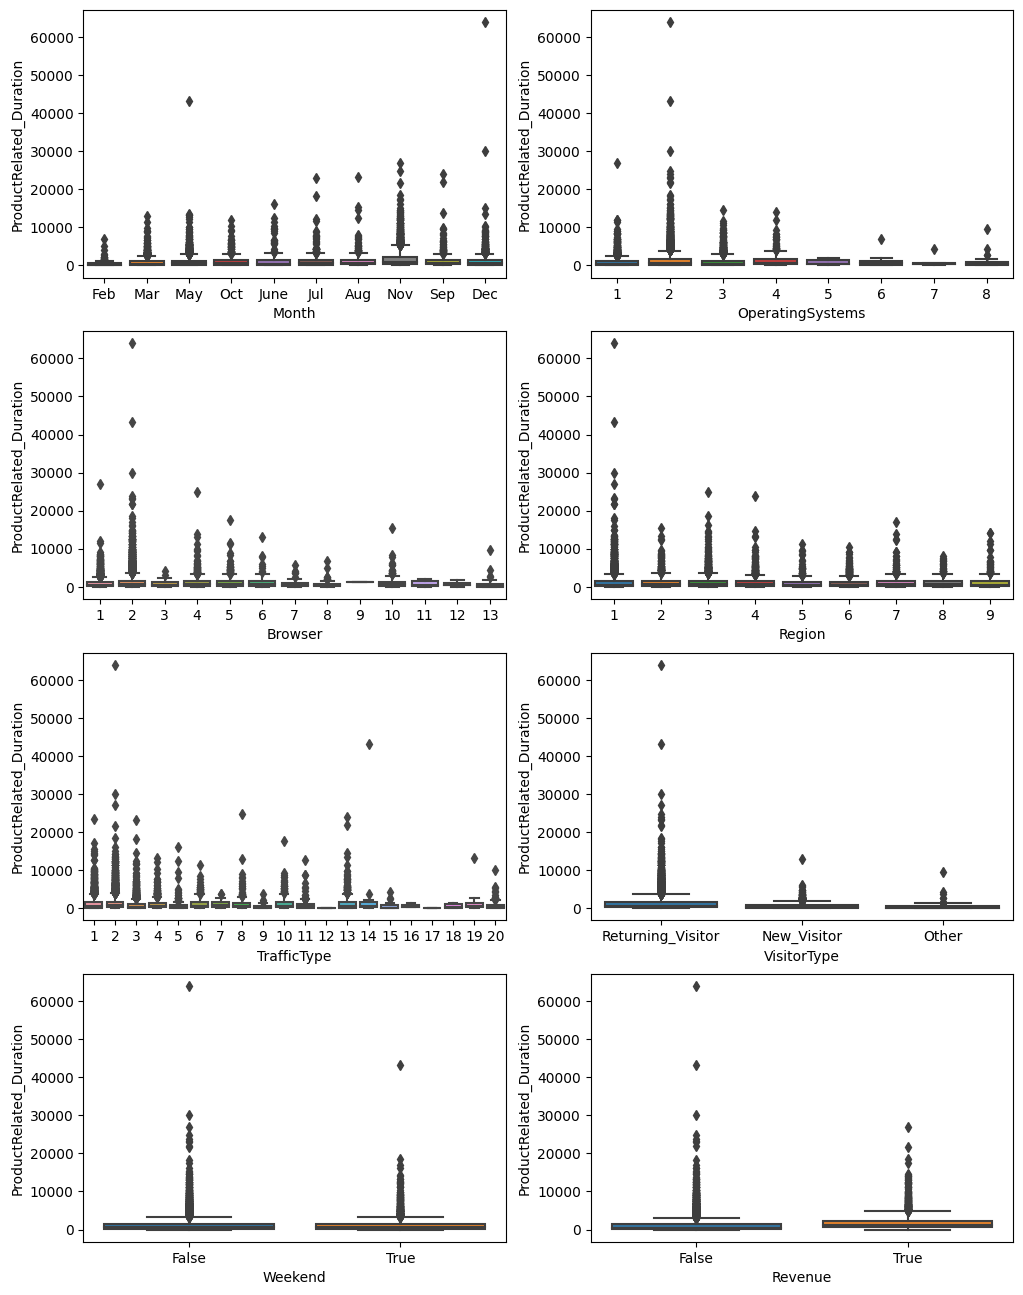

In [ ]:
cat_cols = ["Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend","Revenue"]
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
index = 0
for row in range(4):
  for col in range(2):
    sns.boxplot(data=df, x=cat_cols[index], y = "ProductRelated_Duration", ax=axis[row,col])
    index += 1
plt.show()

ValueError: Could not interpret value `count` for parameter `y`

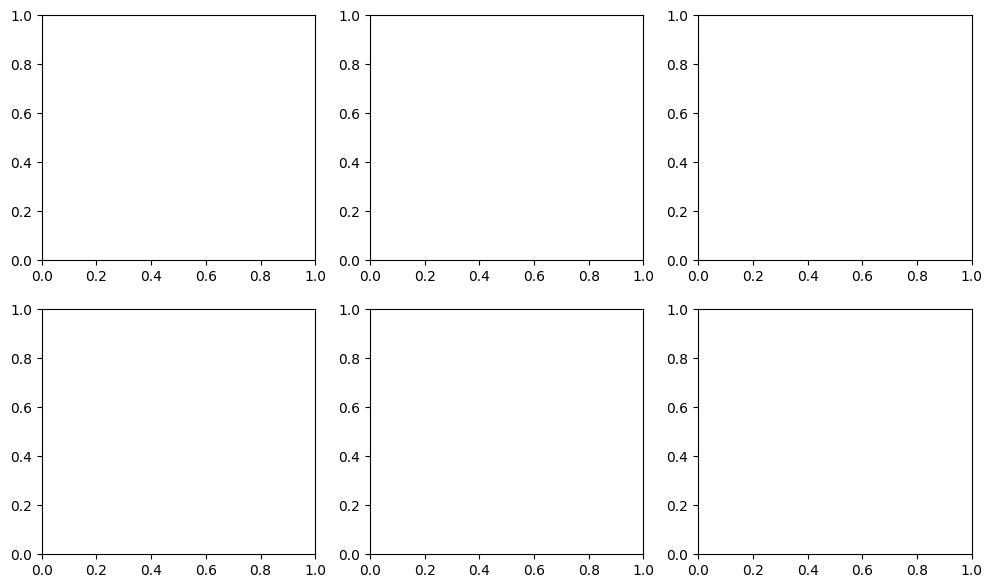

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
index = 0
for row in range(2):
  for col in range(3):
    sns.scatterplot(data=df, x=num_cols[index], y='count',ax=axis[row, col])
    index += 1
plt.show()

## Scatter plots

AttributeError: PathCollection.set() got an unexpected keyword argument 'kde'

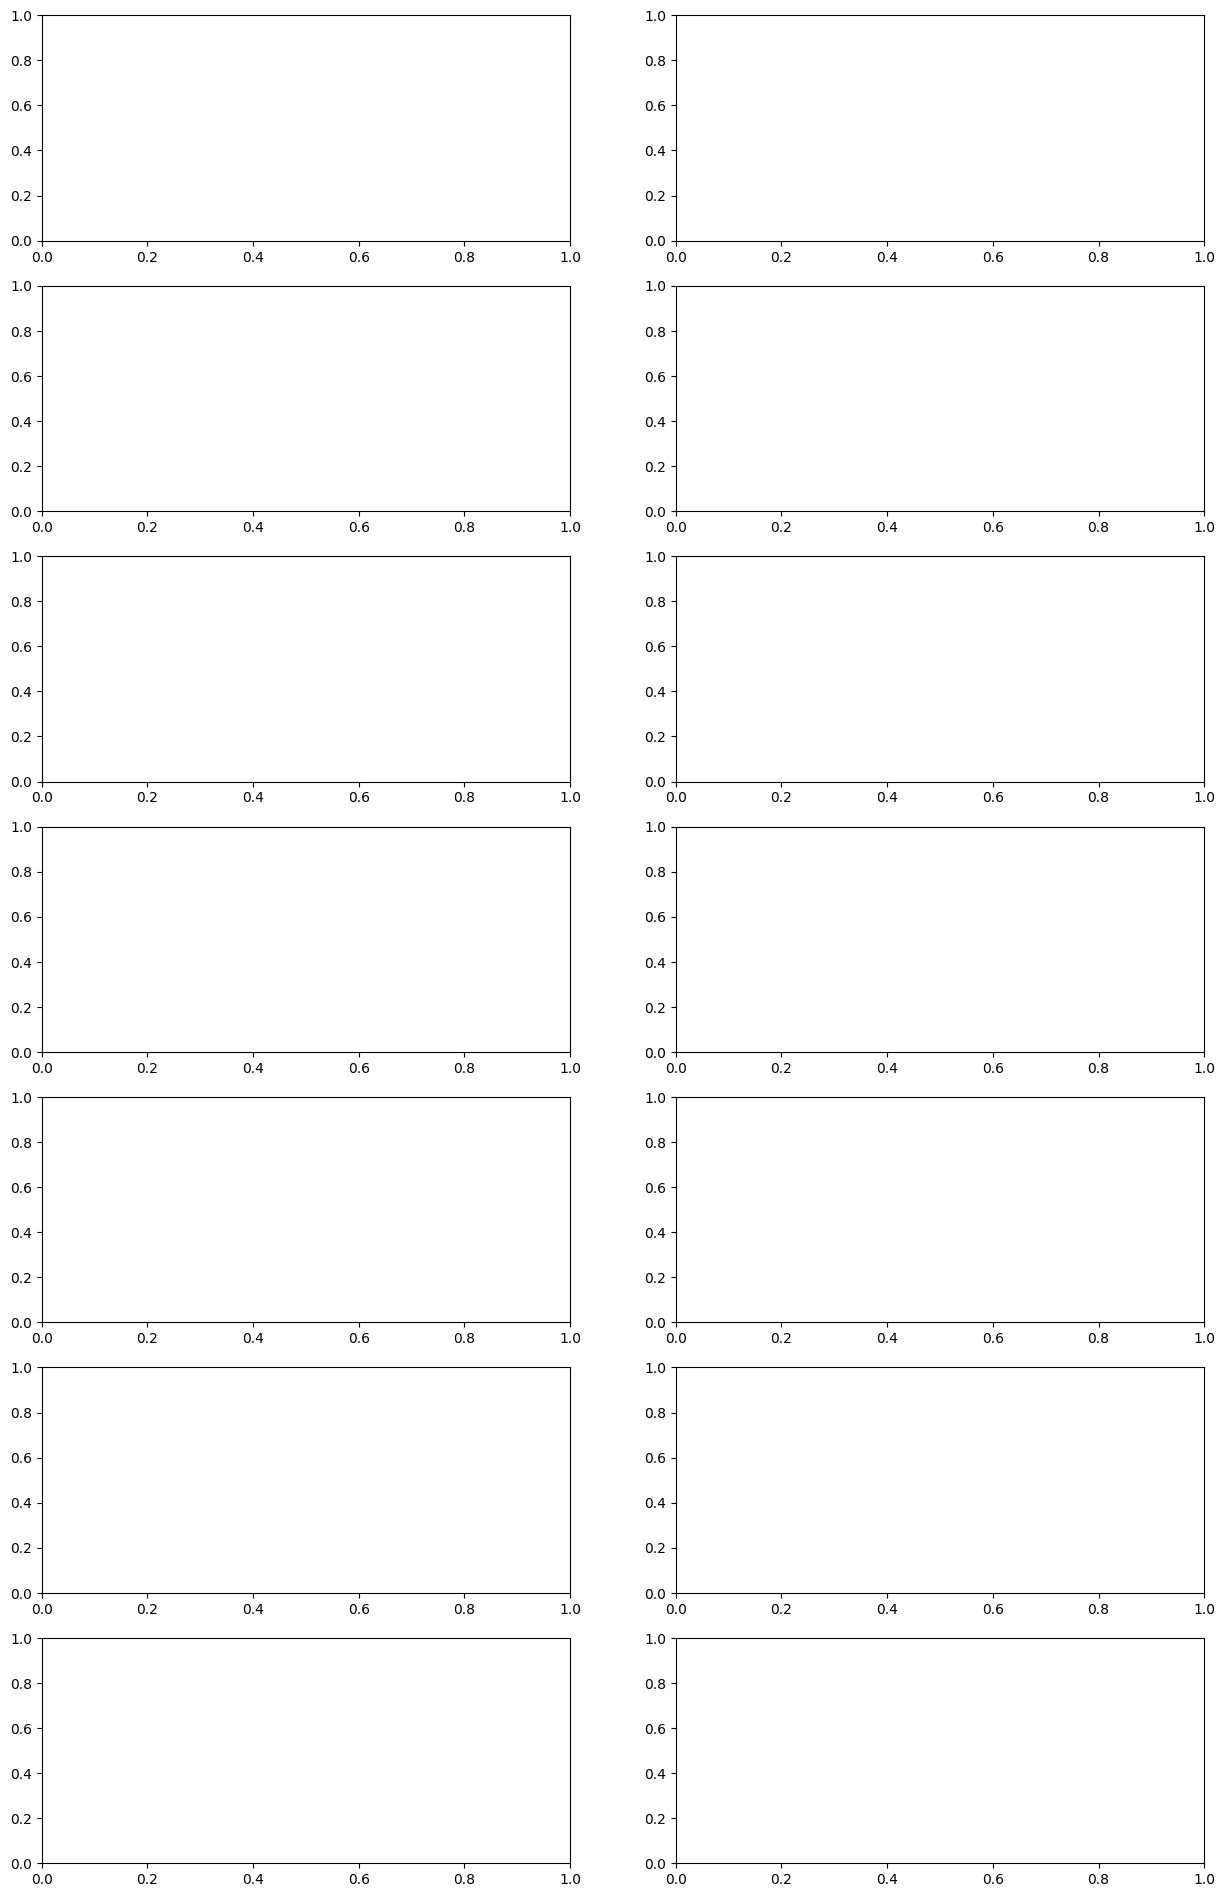

In [ ]:
# understanding the distribution for numerical features

num_cols = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']
fig, axis = plt.subplots(nrows=7, ncols=2, figsize=(15, 24))
index = 0
for row in range(7):
  for col in range(2):
    sns.scatterplot(df[num_cols[index]], ax=axis[row, col], kde=True)
    index += 1
plt.show()
sns.histplot(df[num_cols[-1]], kde=True)
plt.show()

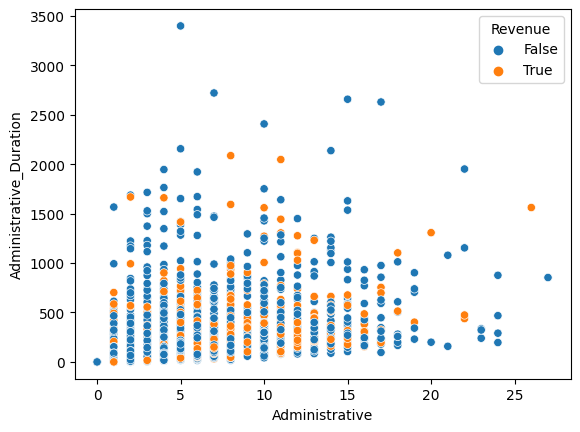

In [ ]:
sns.scatterplot(data=df, x="Administrative", y="Administrative_Duration", hue= "Revenue")
plt.show()

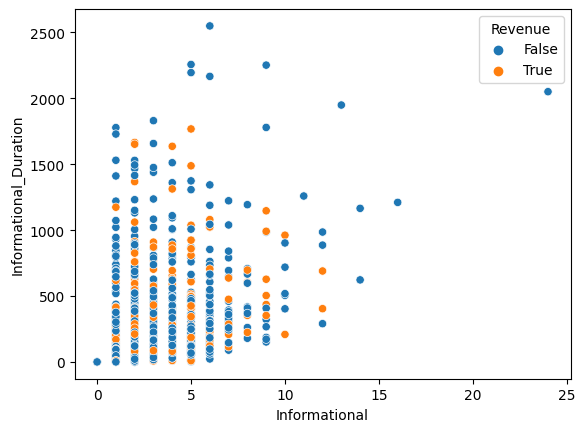

In [ ]:
sns.scatterplot(data=df, x="Informational", y="Informational_Duration", hue= "Revenue")
plt.show()

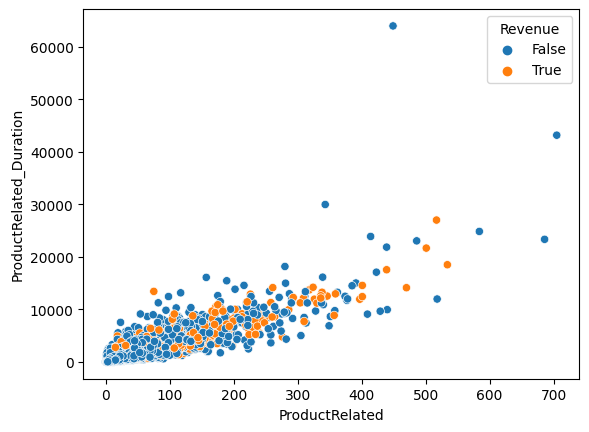

In [ ]:
sns.scatterplot(data=df, x="ProductRelated", y="ProductRelated_Duration", hue= "Revenue")
plt.show()

## Pairplots

In [ ]:
sns.pairplot(df)
plt.show()

# Correlation

<ipython-input-29-1fce66a24a20>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidth=0.5)


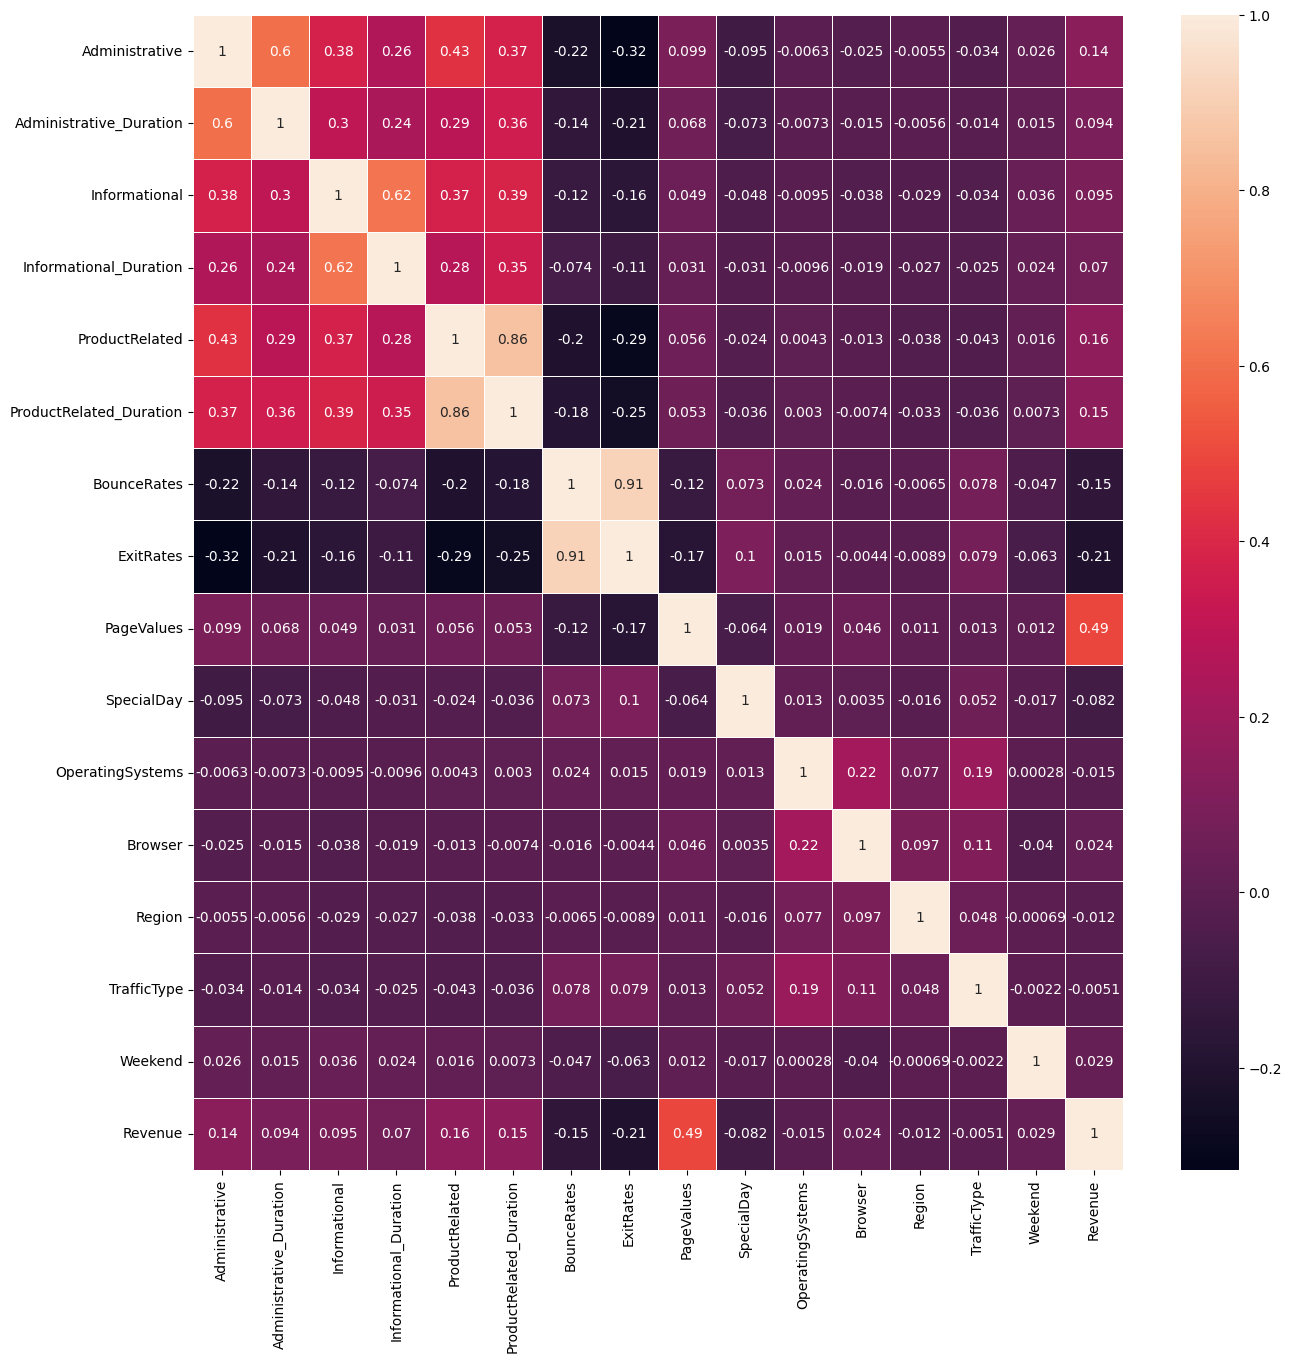

In [ ]:
#df.corr()['count']
fig = plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, linewidth=0.5)
plt.show()

# Summarize page views, durations, and bounce/exit rates for each page category.

## Administrative

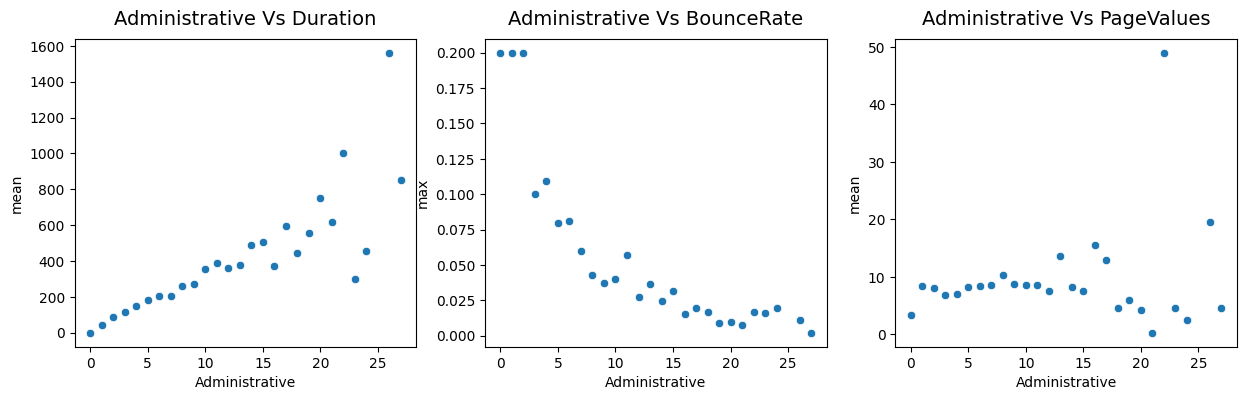

In [ ]:
a = df.groupby("Administrative")["Administrative_Duration"].aggregate(["count","mean"]).sort_values("mean",ascending = False).reset_index()
b =df.groupby("Administrative")["BounceRates"].aggregate(["count","max"]).sort_values("max",ascending = False).reset_index()
c = df.groupby("Administrative")["PageValues"].aggregate(["count","mean"]).sort_values("mean",ascending = False).reset_index()


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
sns.scatterplot(data=a, x='Administrative', y = "mean", ax=axs[0])
sns.scatterplot(data=b, x='Administrative',y = "max", ax=axs[1])
sns.scatterplot(data=c, x='Administrative', y = "mean", ax=axs[2])
axs[0].set_title("Administrative Vs Duration", pad=10, fontsize=14)
axs[1].set_title("Administrative Vs BounceRate", pad=10, fontsize=14)
axs[2].set_title("Administrative Vs PageValues", pad=10,fontsize=14)
plt.show()

## Informational

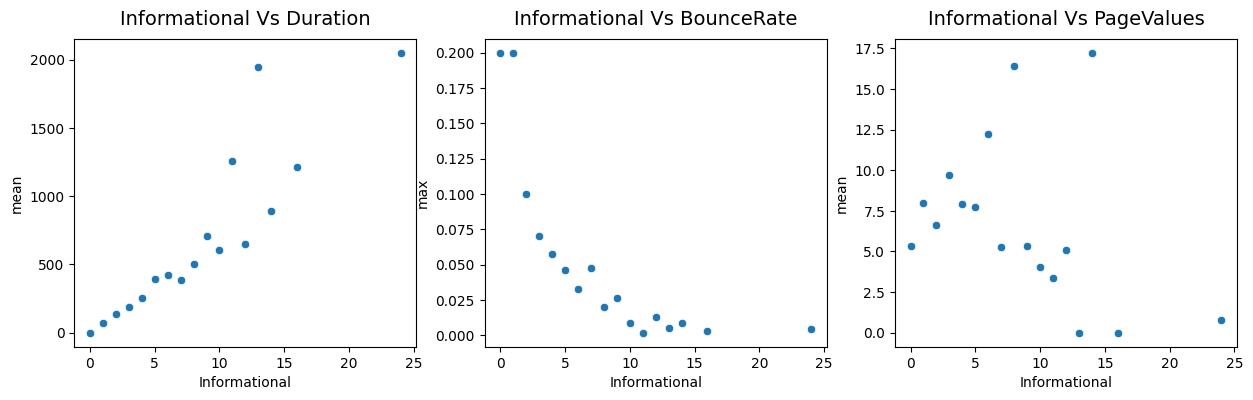

In [ ]:
a = df.groupby("Informational")["Informational_Duration"].aggregate(["count","mean"]).sort_values("mean",ascending = False).reset_index()
b =df.groupby("Informational")["BounceRates"].aggregate(["count","max"]).sort_values("max",ascending = False).reset_index()
c = df.groupby("Informational")["PageValues"].aggregate(["count","mean"]).sort_values("mean",ascending = False).reset_index()


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
sns.scatterplot(data=a, x='Informational', y = "mean", ax=axs[0])
sns.scatterplot(data=b, x='Informational',y = "max", ax=axs[1])
sns.scatterplot(data=c, x='Informational', y = "mean", ax=axs[2])
axs[0].set_title("Informational Vs Duration", pad=10, fontsize=14)
axs[1].set_title("Informational Vs BounceRate", pad=10, fontsize=14)
axs[2].set_title("Informational Vs PageValues", pad=10,fontsize=14)
plt.show()

## ProductRelated

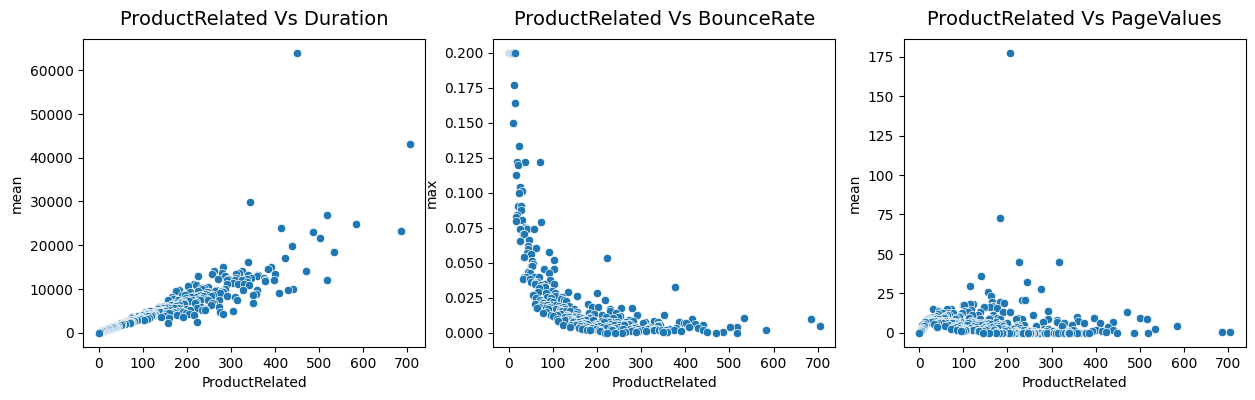

In [ ]:
a = df.groupby("ProductRelated")["ProductRelated_Duration"].aggregate(["count","mean"]).sort_values("mean",ascending = False).reset_index()
b =df.groupby("ProductRelated")["BounceRates"].aggregate(["count","max"]).sort_values("max",ascending = False).reset_index()
c = df.groupby("ProductRelated")["PageValues"].aggregate(["count","mean"]).sort_values("mean",ascending = False).reset_index()


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
sns.scatterplot(data=a, x='ProductRelated', y = "mean", ax=axs[0])
sns.scatterplot(data=b, x='ProductRelated',y = "max", ax=axs[1])
sns.scatterplot(data=c, x='ProductRelated', y = "mean", ax=axs[2])
axs[0].set_title("ProductRelated Vs Duration", pad=10, fontsize=14)
axs[1].set_title("ProductRelated Vs BounceRate", pad=10, fontsize=14)
axs[2].set_title("ProductRelated Vs PageValues", pad=10,fontsize=14)
plt.show()

# Analyze SpecialDay distribution and its correlation with Revenue.


In [ ]:
# Creating Income_bin feature

bins=[-1,0,0.5,1]
group=["Null",'Medium','High']

df['SpeDist']= pd.cut(df['SpecialDay'],bins,labels=group)
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,SpeDist
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,Null
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,Null


In [ ]:
x = pd.crosstab(df["SpeDist"], df["Revenue"], normalize = "index")

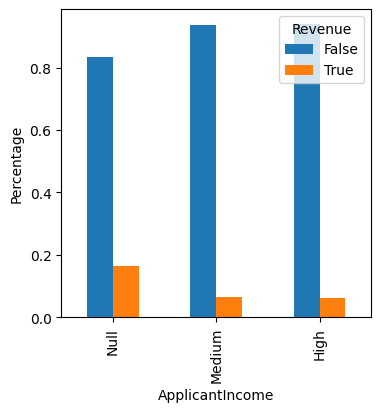

In [ ]:
# Barplot to visualize dependancy between Special day and revenue

x.plot(kind="bar",figsize=(4,4))
plt.xlabel("SpecialDay")
plt.ylabel("Percentage")
plt.show()


# Generate a binary feature indicating whether the user visited all three page categories.

In [ ]:
def page_visit(Administrative,Informational,ProductRelated):
  if Administrative >= 1 and Informational >= 1 and ProductRelated >=1 :
    return 1
  else:
    return 0

In [ ]:
df['APV'] = df.apply(lambda row: page_visit(row['Administrative'], row['Informational'], row['ProductRelated']), axis=1)


In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,SpeDist,APV
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,Null,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,Null,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,Null,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,Null,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,Null,0


In [ ]:
df["APV"].value_counts()

0    10163
1     2167
Name: APV, dtype: int64

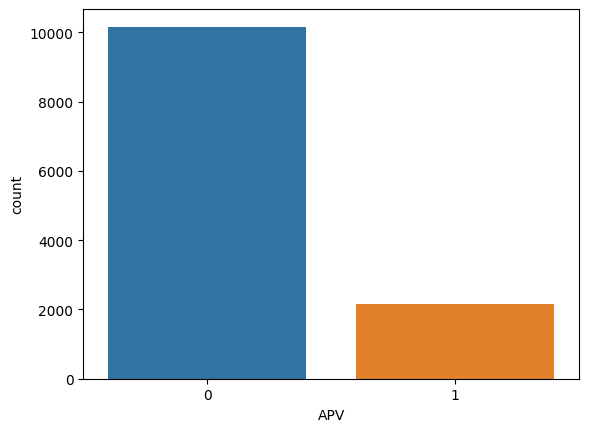

In [ ]:
sns.countplot(data = df , x = "APV")
plt.show()


# Explore PageValues distribution and its relationship with TrafficType, VisitorType, and Region.

<Axes: xlabel='PageValues', ylabel='Count'>

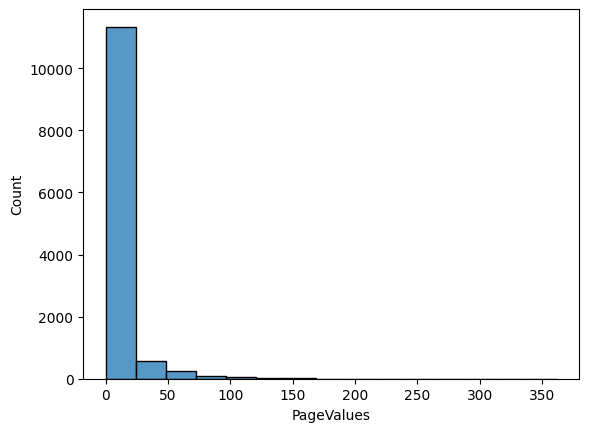

In [ ]:
sns.histplot(data= df, x = "PageValues")

In [ ]:
# Creating PageValues feature

bins=[-1,0,100,200,300,400]
group=["Null","Medium","Average","High", "VeryHigh"]

df['PageValuesBin']= pd.cut(df['PageValues'],bins,labels=group)
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,TSLength,SessionBin,PageValuesBin
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,...,1,1,1,1,Returning_Visitor,False,False,0.000000,Null,Null
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,...,2,2,1,2,Returning_Visitor,False,False,0.017778,Low,Null


<Axes: xlabel='PageValuesBin', ylabel='count'>

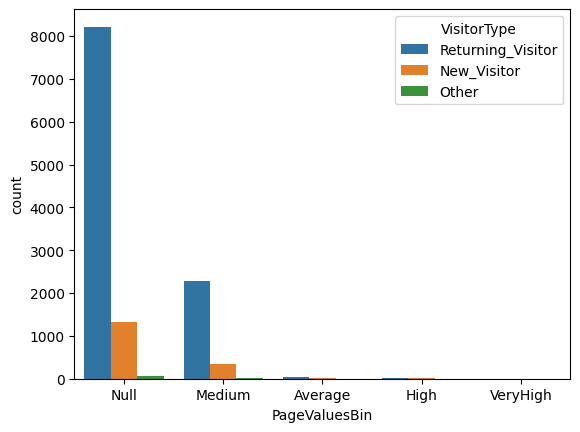

In [ ]:
sns.countplot(df, x = "PageValuesBin", hue = "VisitorType")

In [ ]:
a = pd.crosstab(df["PageValuesBin"], df["VisitorType"])
a

VisitorType,New_Visitor,Other,Returning_Visitor
PageValuesBin,,,
Null,1313,69,8218
Medium,354,11,2283
Average,19,3,44
High,7,1,6
VeryHigh,1,1,0


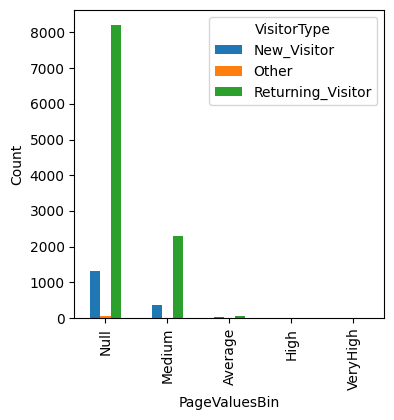

In [ ]:
# Barplot to visualize dependancy between PageValuesBin and VisitorType

a.plot(kind="bar",figsize=(4,4))
plt.xlabel("PageValuesBin")
plt.ylabel("Count")
plt.show()


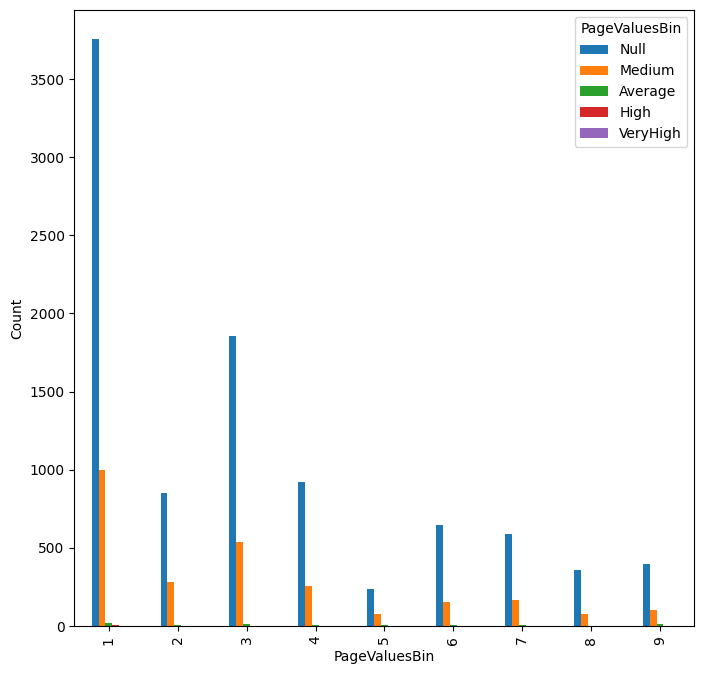

In [ ]:
# Barplot to visualize dependancy between PageValuesBin and Region

b = pd.crosstab(df["Region"], df["PageValuesBin"] )


b.plot(kind="bar",figsize=(8,8))
plt.xlabel("PageValuesBin")
plt.ylabel("Count")
plt.show()


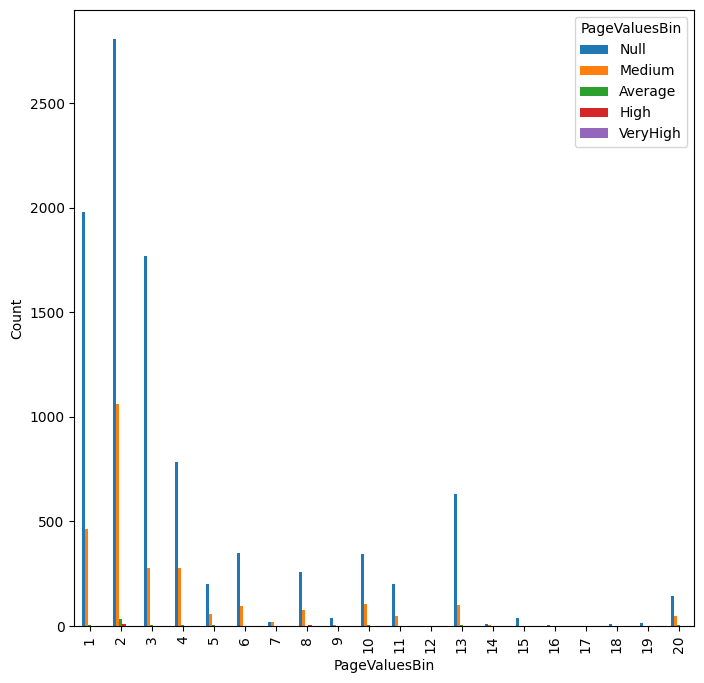

In [ ]:
# Barplot to visualize dependancy between PageValuesBin and TrraficType

c = pd.crosstab(df["TrafficType"], df["PageValuesBin"] )

c.plot(kind="bar",figsize=(8,8))
plt.xlabel("PageValuesBin")
plt.ylabel("Count")
plt.show()


# Investigate user session lengths and their impact on conversion rates.

In [ ]:
df["TSLength"] = (df["Administrative_Duration"] + df["Informational_Duration"] + df["ProductRelated_Duration"]) / 3600
df.head()

# Divide by 60 to convert total session length to minutes

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,TSLength
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0.000000
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0.017778
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0.000000
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0.000741
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0.174306


In [ ]:
# Creating SessionBin feature

bins=[-1,0,4,8,12,16,20]
group=["Null","Low","Medium","Average","High", "VeryHigh"]

df['SessionBin']= pd.cut(df['TSLength'],bins,labels=group)
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,TSLength,SessionBin
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0.000000,Null
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0.017778,Low


In [ ]:
y = pd.crosstab(df["SessionBin"], df["Revenue"])

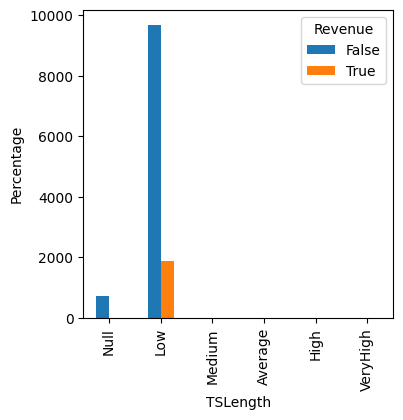

In [ ]:
# Barplot to visualize dependancy between Special day and revenue

y.plot(kind="bar",figsize=(4,4))
plt.xlabel("TSLength")
plt.ylabel("Percentage")
plt.show()


# Group users based on VisitorType, OperatingSystems, and Region to identify potential differences in behavior and conversion rates.

In [ ]:
df.groupby(["VisitorType","OperatingSystems","Region"])["TSLength"].mean().reset_index()

,VisitorType,OperatingSystems,Region,TSLength
0,New_Visitor,1,1,0.153253
1,New_Visitor,1,2,0.162232
2,New_Visitor,1,3,0.172492
3,New_Visitor,1,4,0.159110
4,New_Visitor,1,5,0.117576
...,...,...,...,...
110,Returning_Visitor,8,4,0.265486
111,Returning_Visitor,8,5,0.024421
112,Returning_Visitor,8,6,0.000000
113,Returning_Visitor,8,7,0.004722


<Axes: xlabel='VisitorType', ylabel='TSLength'>

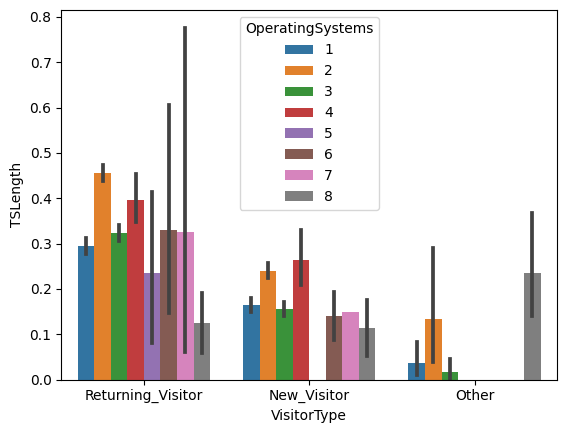

In [ ]:
sns.barplot(data = df, x = "VisitorType", y = "TSLength", hue = "OperatingSystems")

<Axes: xlabel='VisitorType', ylabel='TSLength'>

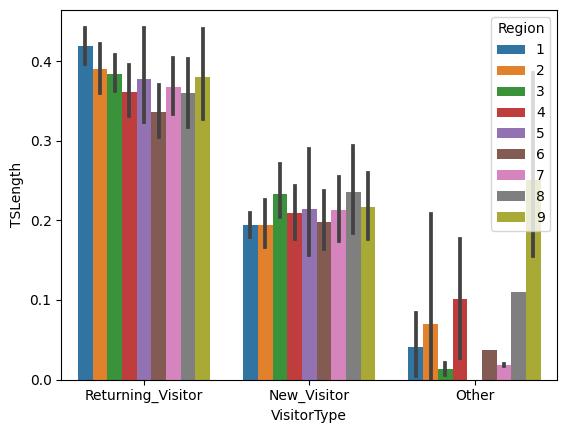

In [ ]:
sns.barplot(data = df, x = "VisitorType", y = "TSLength", hue = "Region")

# Segment users based on TrafficType and analyze their engagement patterns and purchase probability.

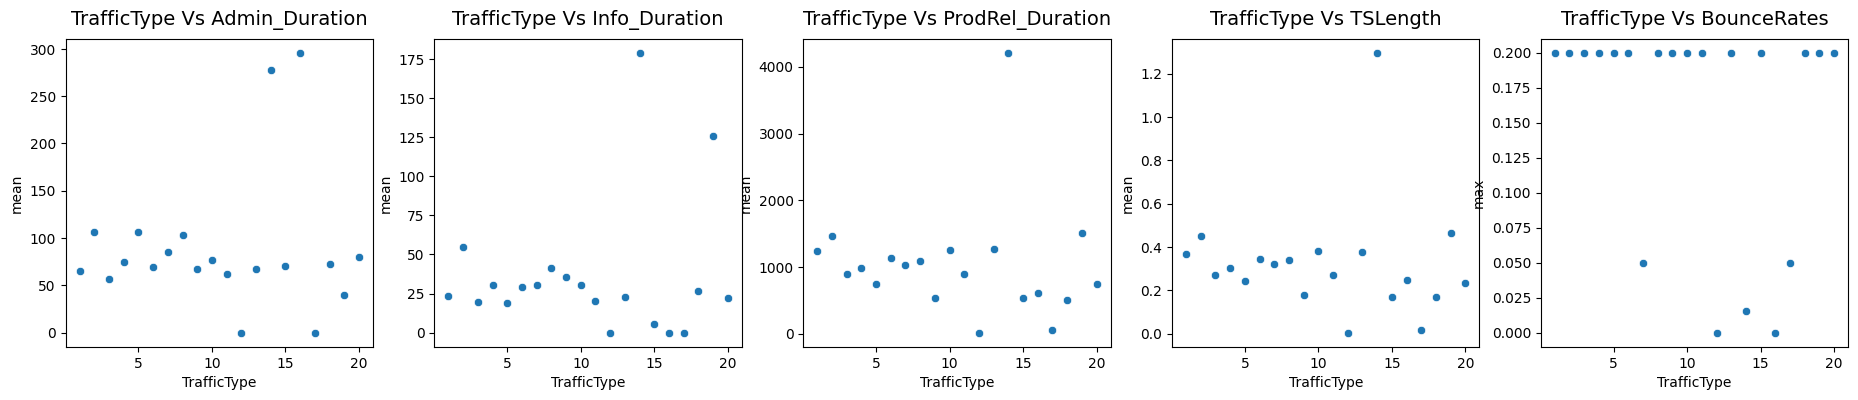

In [ ]:
a = df.groupby("TrafficType")["Administrative_Duration"].aggregate(["count","mean"]).sort_values("mean",ascending = False).reset_index()
b = df.groupby("TrafficType")["Informational_Duration"].aggregate(["count","mean"]).sort_values("mean",ascending = False).reset_index()
c = df.groupby("TrafficType")["ProductRelated_Duration"].aggregate(["count","mean"]).sort_values("mean",ascending = False).reset_index()
e = df.groupby("TrafficType")["TSLength"].aggregate(["count","mean"]).sort_values("mean",ascending = False).reset_index()
d =df.groupby("TrafficType")["BounceRates"].aggregate(["count","max"]).sort_values("max",ascending = False).reset_index()



fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(23, 4))
sns.scatterplot(data=a, x='TrafficType', y = "mean", ax=axs[0])
sns.scatterplot(data=b, x='TrafficType', y = "mean", ax=axs[1])
sns.scatterplot(data=c, x='TrafficType', y = "mean", ax=axs[2])
sns.scatterplot(data=e, x='TrafficType', y = "mean", ax=axs[3])
sns.scatterplot(data=d, x='TrafficType',y = "max", ax=axs[4])

axs[0].set_title("TrafficType Vs Admin_Duration", pad=10, fontsize=14)
axs[1].set_title("TrafficType Vs Info_Duration", pad=10,fontsize=14)
axs[2].set_title("TrafficType Vs ProdRel_Duration", pad=10,fontsize=14)
axs[3].set_title("TrafficType Vs TSLength", pad=10,fontsize=14)
axs[4].set_title("TrafficType Vs BounceRates", pad=10, fontsize=14)
plt.show()

<Axes: xlabel='TrafficType', ylabel='count'>

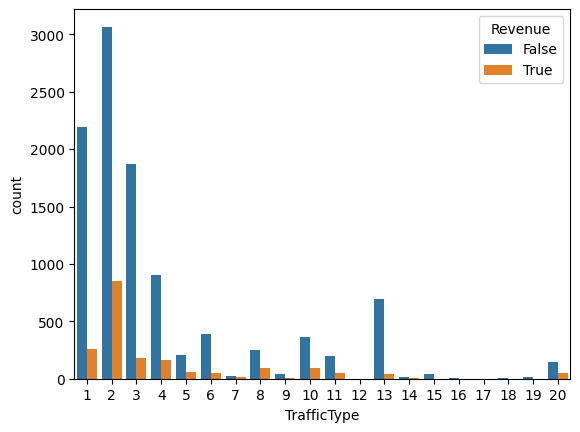

In [ ]:
sns.countplot(data= df, x = "TrafficType", hue = "Revenue")